Documenting bank failure criteria for us banks from 1934 to present day

https://www.kaggle.com/fdic/bank-failures

What type of banking institution is the most likely to fail? How have bank failure rates changed over time? What commercial bank failure cost the federal government the most to resolve?

In [70]:
#importing libraries

#Organization and Liner algebra
import pandas as pd
import numpy as np

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading data
data = pd.read_csv('banks.csv')

#data overview
print(data.shape)
data.info()

(3484, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.8+ KB


Notes: total assets should prob be int but is flt
decide on what cols we need and was arent usefull.....might be able to ignore most of the missing data by not needing columns with missing info

3,484 institutions, 12 columns of info

In [3]:
#looking at numerical data
data.describe()

,Financial Institution Number,Certificate Number,Total Deposits,Total Assets,Estimated Loss (2015)
count,2883.000000,2999.000000,3.484000e+03,3.333000e+03,2.509000e+03
mean,5571.146028,24013.859286,2.997762e+05,4.045884e+05,7.064435e+04
std,2846.666068,12234.422998,3.304676e+06,5.454873e+06,3.305872e+05
min,1122.000000,40.000000,0.000000e+00,1.400000e+01,-4.386000e+03
25%,2820.500000,17413.000000,1.229300e+04,1.505100e+04,3.852000e+03
50%,4592.000000,24846.000000,4.172100e+04,4.752300e+04,1.335400e+04
75%,7311.500000,30895.500000,1.562415e+05,1.734780e+05,4.458500e+04
max,11919.000000,91189.000000,1.882608e+08,3.070216e+08,1.243800e+07


Really lo

In [5]:
data['Institution Name'].unique()

array(['BANK OF AMERICA TRUST CO.', 'FON DU LAC STATE BANK',
       'FIRST NATIONAL BANK OF LIMA', ..., 'ALLIED BANK',
       'HARVEST COMMUNITY BANK', 'SEAWAY BANK AND TRUST COMPANY'],
      dtype=object)

In [6]:
df = data.copy()
df.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)'],
      dtype='object')

In [7]:
df = df.drop(columns =['Financial Institution Number','Certificate Number'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 10 columns):
Institution Name         3484 non-null object
Institution Type         3484 non-null object
Charter Type             3484 non-null object
Headquarters             3484 non-null object
Failure Date             3484 non-null object
Insurance Fund           3484 non-null object
Transaction Type         3484 non-null object
Total Deposits           3484 non-null int64
Total Assets             3333 non-null float64
Estimated Loss (2015)    2509 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 272.3+ KB


Time to investigate the failure date and see what that looks like.  First we'll make it a date time object, then we'll look at the distribution that shows count of fails by **date**

In [9]:
df['Failure Date'].describe()

count           3484
unique          1639
top       3/16/1989 
freq              51
Name: Failure Date, dtype: object

In [10]:
pd.to_datetime(df['Failure Date'])

0      1934-04-19
1      1934-05-28
2      1934-07-18
3      1934-07-18
4      1934-08-06
          ...    
3479   2016-05-06
3480   2016-08-19
3481   2016-09-23
3482   2017-01-13
3483   2017-01-27
Name: Failure Date, Length: 3484, dtype: datetime64[ns]

In [24]:
df['Failure Month Year'] = pd.to_datetime(df['Failure Date']).dt.to_period('M')


In [46]:
z = df['Failure Month Year'].unique()
y = [df['Failure Month Year'][df['Failure Month Year']==i].count() for i in z]
x = np.arange(0,len(z),1)
print(len(z), len(y))

512 512


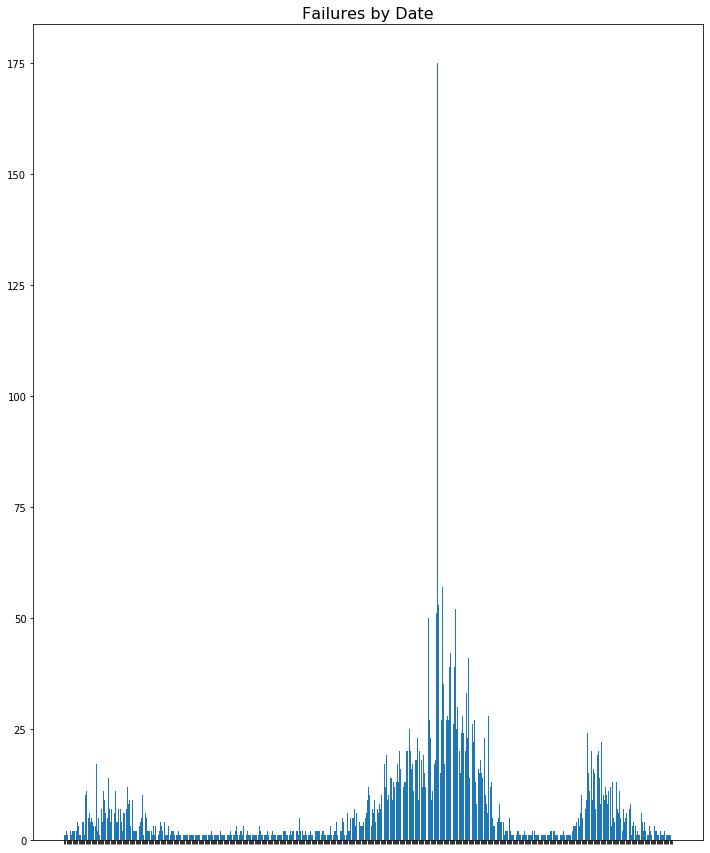

In [65]:
#creating figure and axes object
fig, ax = plt.subplots(1,1, figsize=(12,15))
#creating bar graph
ax.bar(x,y)
#label x val with dates
ax.set_xticks(x)
ax.set_xticklabels(x,visible=False)
#setting title
plt.title('Failures by Date', fontsize = 16)
plt.show()

k- Nearest neighbors (k-NNs)and Support Vector Machines (SVMs)

# Get Bank Data For Banks that did not fail for the same time-frame

DO I NEED THESE ACCURACY SCORES IF I HAVE THE BEST SCORE AND THE BEST PARAMS - THINK ABOUT IT

In [68]:
# definining function that will print the metrics of the models we try
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [ ]:
X = None
y = None 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Create the pipeline
knn_pipe = Pipeline([('scl',StandardScaler()),
                ('knn', KNeighborsClassifier(random_state=123))])

# Create the grid parameter
knn_grid = [{'n_neighbors' : list(range(1,30,1))}]

# Create the grid
knn_gridsearch = GridSearchCV(estimator=knn_pipe,
                              param_grid = knn_grid,
                              scoring ='accuracy',
                              cv=3)

# Fit using grid search
knn_gridsearch.fit(X_train, y_train)


# Pprint best scores developed by gridsearch
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

#Predictions
knn_preds = knn.predict(X_test)
knn_labels = y_test

In [ ]:
print_metrics(knn_labels, knn_preds)

when performing SVM on a real-world dataset, you should ALWAYS scale the data before fitting a model.

In [ ]:
#Create the pipeline
svm_pipe = Pipeline([('scl', MinMaxScaler()),
                ('pca', PCA(n_components=2)),
                ('svm', svm.SVC(random_state=123))])

# Create the grid parameter
svm_grid = [{'svm__kernel': ['linear','poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree0': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}]

# Create the grid
svm_gridsearch = GridSearchCV(estimator=svm_pipe,
                  param_grid=svm_grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
svm_gridsearch.fit(X_train, y_train)

#Predictions
svm_preds = svm.SVC.predict(X_test)
svm_labels = y_test

In [ ]:
print_metrics(svm_labels, svm_preds)